# Seed-voxel functional connectivity

## Load libraries

In [1]:
import numpy as np
from nilearn import datasets
from nilearn import input_data
from nilearn.connectome import ConnectivityMeasure
from nilearn import plotting

## Load data

In [7]:
print(datasets.get_data_dirs())
import os
# 设置 nilearn 下载路径
os.environ['NILEARN_SHARED_DATA'] = r'F:\_Sorrow\PhD\FMRI\Datasets\nilearn_data'
os.environ['NILEARN_DATA'] = r'F:\_Sorrow\PhD\FMRI\Datasets\nilearn_data'
print(datasets.get_data_dirs())

['C:\\Users\\Sorrow/nilearn_data']
['F:\\_Sorrow\\PhD\\FMRI\\Datasets\\nilearn_data', 'F:\\_Sorrow\\PhD\\FMRI\\Datasets\\nilearn_data', 'C:\\Users\\Sorrow/nilearn_data']


In [9]:
# Load fMRI data
data_dir = r'F:\_Sorrow\PhD\FMRI\Datasets\nilearn_data'
dataset = datasets.fetch_development_fmri(n_subjects=1, data_dir=data_dir)
func_filename = dataset.func[0]
confounds_filename = dataset.confounds[0]


Added README.md to F:\_Sorrow\PhD\FMRI\Datasets\nilearn_data


Dataset created in F:\_Sorrow\PhD\FMRI\Datasets\nilearn_data\development_fmri


Added README.md to F:\_Sorrow\PhD\FMRI\Datasets\nilearn_data\development_fmri


Dataset created in F:\_Sorrow\PhD\FMRI\Datasets\nilearn_data\development_fmri\development_fmri



 ...done. (8 seconds, 0 min)


 ...done. (3 seconds, 0 min)


 ...done. (3 seconds, 0 min)


## Create a seed

In [10]:
#(0, -52, 18) 对应 后扣带皮层（Posterior Cingulate Cortex, PCC）
pcc_coords = [(0, -52, 18)]
seed_masker = input_data.NiftiSpheresMasker(
    pcc_coords, radius=8,
    detrend=True, standardize=True)

## Extract timeseries from a seed

In [11]:
print(func_filename)
# 去除脑动等杂讯信号，得到ROI区域干净的fmri信息
seed_timeseries = seed_masker.fit_transform(func_filename,
                                             confounds=confounds_filename)
seed_timeseries = np.squeeze(seed_timeseries)

F:\_Sorrow\PhD\FMRI\Datasets\nilearn_data\development_fmri\development_fmri\sub-pixar123_task-pixar_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz


## Estract timeseries from the whole brain

In [12]:
#提取全脑的BOLD信号
brain_masker = input_data.NiftiMasker(
    smoothing_fwhm=8,
    detrend=True, standardize=True,
    memory='nilearn_cache', memory_level=1, verbose=0)

brain_timeseries = brain_masker.fit_transform(func_filename,
                                               confounds=confounds_filename)

In [13]:
# Print shape of seed time-series
print(seed_timeseries.shape)

# Print shape of brain time-series
print(brain_timeseries.shape)

(168,)
(168, 32504)


## Calculate seed to voxel correlations

In [14]:
# Calculate Pearson product-moment correlation coefficient between seed and all voxel trime-series
from scipy import stats

corr_map = np.zeros(brain_timeseries.shape[1])

for i in range(brain_timeseries.shape[1]):
    corr_map[i] = stats.pearsonr(seed_timeseries, brain_timeseries[:,i])[0]

## Plot correlation using statistical map plot

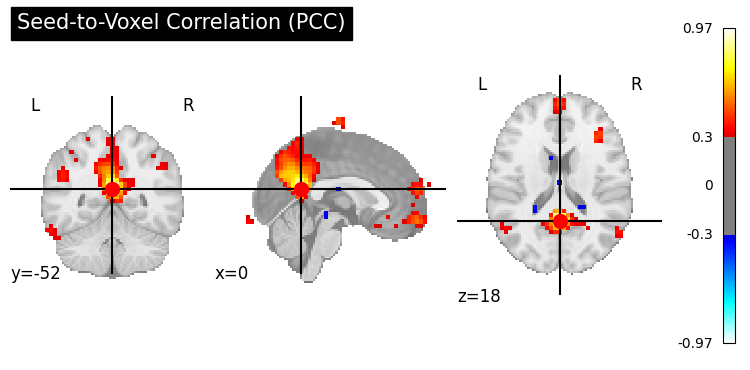

In [15]:
seed_to_voxel_correlations_img = brain_masker.inverse_transform(corr_map.T)

# Plot correlation map using plot_stat_map
# 绘制相关系数图
display = plotting.plot_stat_map(
    seed_to_voxel_correlations_img,
    threshold=0.3,          # 只显示 r > 0.3 的区域，可根据需求调整
    display_mode='ortho',   # 三个正交切面
    cut_coords=(0, -52, 18),# PCC seed 坐标，可根据实际 seed_coords 调整
    title='Seed-to-Voxel Correlation (PCC)'
)

# Add seed ROI marker with display.add_markers()
# 在图上标出 seed ROI
display.add_markers(pcc_coords, marker_color='red', marker_size=100)

# 显示图像
plotting.show()
